In [1]:
import turicreate as tc
sales = tc.SFrame('home_data.sframe').to_dataframe()
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7.0,1180.0,0.0,1955.0,0.0,98178,47.511234,-122.256775,1340.0,5650.0
1,6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7.0,2170.0,400.0,1951.0,1991.0,98125,47.721023,-122.318862,1690.0,7639.0
2,5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6.0,770.0,0.0,1933.0,0.0,98028,47.737927,-122.233196,2720.0,8062.0
3,2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7.0,1050.0,910.0,1965.0,0.0,98136,47.520820,-122.393185,1360.0,5000.0
4,1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8.0,1680.0,0.0,1987.0,0.0,98074,47.616812,-122.044901,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,2014-05-21 00:00:00+00:00,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8.0,1530.0,0.0,2009.0,0.0,98103,47.699285,-122.346105,1530.0,1509.0
21609,6600060120,2015-02-23 00:00:00+00:00,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8.0,2310.0,0.0,2014.0,0.0,98146,47.510733,-122.361867,1830.0,7200.0
21610,1523300141,2014-06-23 00:00:00+00:00,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7.0,1020.0,0.0,2009.0,0.0,98144,47.594358,-122.298654,1020.0,2007.0
21611,0291310100,2015-01-16 00:00:00+00:00,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8.0,1600.0,0.0,2004.0,0.0,98027,47.534499,-122.069087,1410.0,1287.0


In [2]:
sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

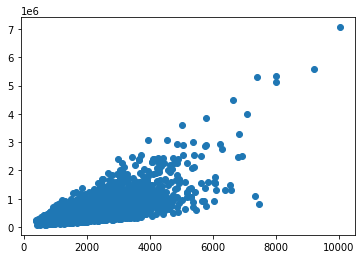

In [4]:
plt.scatter(sales['sqft_living'][1:5000], sales['price'][1:5000])

## Split data into training and testing sets

In [36]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(sales, test_size=0.2, random_state=42, shuffle=False)

## Fit training data with linear regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [37]:
train_X = train[['sqft_living']]
train_y = train[['price']]
reg = LinearRegression().fit(train_X, train_y)

In [8]:
X = np.array(train[['sqft_living']])
y = np.array(train[['price']])
reg3 = LinearRegression().fit(X, y)
y_test = np.array(test[['sqft_living']])

pred_y_array = reg3.predict(y_test)
print(mean_squared_error(y_test, pred_y_array))

367707026180.0044


### Difference between `train[['sqft_living']]` and `train[['price']]`

- type of `train[['sqft_living']]`: DataFrame

- type of `train['sqft_living']`: Series

## Make predictions using the testing set

In [40]:
test_x = test[['sqft_living']]
pred_y = reg.predict(test_x)
test_y = test[['price']]

print("type(text_x): ", type(test_x))
print("type(text_y): ", type(test_y))
print("type(pred_y): ", type(pred_y))

type(text_x):  <class 'pandas.core.frame.DataFrame'>
type(text_y):  <class 'pandas.core.frame.DataFrame'>
type(pred_y):  <class 'numpy.ndarray'>


## Evaluate fitting

In [41]:
# The coefficients
print("Coefficients: %.2f" % reg.coef_)
# The intercept
print("Intercept: %.2f" % reg.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, pred_y))

# The root mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(test_y, pred_y)))
# The coefficient of determination: 1 is perfect prediction

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, pred_y))

Coefficients: 283.88
Intercept: -49860.77
Mean squared error: 69699591867.50
Root Mean squared error: 264006.80
Coefficient of determination: 0.49


## Visualization

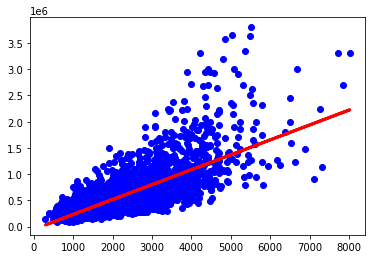

In [42]:
%matplotlib inline
plt.scatter(test_x, test_y, color='blue')
plt.plot(test_x['sqft_living'], pred_y, color='red', linewidth=3)

plt.show()

## Explore other features of the data

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [85]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']


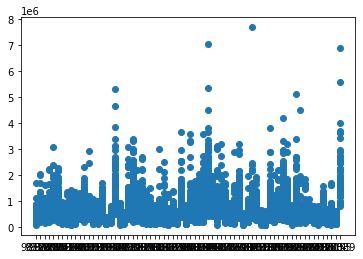

In [14]:
#plt.scatter(sales['zipcode'], sales['price'])

In [86]:
train_X2 = train[features]
train_y2 = train[['price']]
reg2 = LinearRegression().fit(train_X2, train_y2)

In [87]:
train[features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,3.0,1.00,1180.0,5650.0,1.0
1,3.0,2.25,2570.0,7242.0,2.0
2,2.0,1.00,770.0,10000.0,1.0
3,4.0,3.00,1960.0,5000.0,1.0
4,3.0,2.00,1680.0,8080.0,1.0


In [88]:
test_X2 = test[features]
pred_y2 = reg2.predict(test_X2)
test_y2 = test[['price']]

In [89]:
# The coefficients
print("Coefficients: ", np.round(reg2.coef_,0))
# The intercept
print("Intercept: %.2f" % reg2.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y2, pred_y2))

# The root mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(test_y2, pred_y2)))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y2, pred_y2))

Coefficients:  [[-55279.   1891.    319.     -0.  -4655.]]
Intercept: 72680.49
Mean squared error: 67009186490.95
Root Mean squared error: 258861.33
Coefficient of determination: 0.51


## One hot encoding for zipcode

In [119]:
sales2 = pd.concat((sales[features + ['zipcode', 'price', 'id']],pd.get_dummies(sales.zipcode)),1)
features2 = sales2.columns.tolist()
features2.remove('zipcode')
features2.remove('price')
features2.remove('id')
features2[0:10]


/var/folders/n1/7h17z12x07x_gm5sbswxd9k00000gn/T/ipykernel_13822/3719166185.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  sales2 = pd.concat((sales[features + ['zipcode', 'price', 'id']],pd.get_dummies(sales.zipcode)),1)


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005']

In [73]:
train2, test2 = train_test_split(sales2, test_size=0.2, random_state=42, shuffle=False)


In [90]:
from sklearn.linear_model import Ridge

In [102]:
from sklearn.linear_model import Lasso

In [113]:
train2_X = train2[features2]
train2_y= train2['price']
test2_X = test2[features2]
test2_y = test2[['price']]

reg_onehot = Lasso(alpha=100).fit(train2_X, train2_y)
pred2_y = reg_onehot.predict(test2_X)

In [114]:
# The coefficients
print("Coefficients: ", np.round(reg_onehot.coef_,0))
# The intercept
print("Intercept: %.2f" % reg_onehot.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test2_y, pred2_y))

# The root mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(test2_y, pred2_y)))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test2_y, pred2_y))

Coefficients:  [-4.526800e+04  1.448400e+04  2.710000e+02  0.000000e+00 -9.036000e+03
 -1.523570e+05 -1.199320e+05 -1.528540e+05  6.344850e+05  1.669810e+05
  1.628250e+05  9.965400e+04  1.178500e+05 -7.451600e+04 -2.711300e+04
 -6.691100e+04 -8.086600e+04 -1.274090e+05 -1.722420e+05 -0.000000e+00
 -0.000000e+00 -2.852200e+04  5.014400e+04 -1.443330e+05 -1.426930e+05
 -1.390080e+05  2.212570e+05  5.453300e+04 -1.421080e+05  1.157071e+06
  4.347340e+05 -1.489970e+05 -4.638000e+04  7.906100e+04  1.604600e+04
 -9.960400e+04 -5.002000e+04 -1.237670e+05 -6.265500e+04 -7.981600e+04
  0.000000e+00 -0.000000e+00  3.512900e+04  5.251600e+04 -1.327800e+04
 -1.779060e+05  3.688850e+05  2.017750e+05  3.511990e+05 -1.113300e+04
  1.892460e+05 -2.480700e+04  3.813210e+05  4.967540e+05  1.844820e+05
  1.815350e+05  1.745500e+05  2.547200e+04  3.764570e+05  2.032350e+05
  5.281200e+04  5.833400e+04  9.361000e+03  1.376850e+05  1.481090e+05
 -6.029000e+03 -4.825000e+04  6.349000e+03 -1.961400e+04 -8.57

## Apply learned models to make predictions 

In [18]:
house1 = sales[sales['id']=='5309101200']
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,2014-06-05 00:00:00+00:00,620000.0,4.0,2.25,2400.0,5350.0,1.5,0,0,...,7.0,1460.0,940.0,1929.0,0.0,98117,47.676324,-122.370101,1250.0,4880.0


In [19]:
print(house1['price'])

1054    620000.0
Name: price, dtype: float64


In [120]:
print(reg.predict(house1[['sqft_living']]))
print(reg2.predict(house1[features]))
print(reg_onehot.predict(sales2[sales['id']=='5309101200'][features2]))



[[631461.36986382]]
[[612833.3755994]]
[727537.09399579]


In [21]:
house2 = sales[sales['id']=='1925069082']
house2[['price']]

,price
1361,2200000.0


In [121]:
print(reg.predict(house2[['sqft_living']]))

print(type(house2[['sqft_living']]))
print(type(reg.predict(house2[['sqft_living']])))

print(reg2.predict(house2[features]))
print(reg_onehot.predict(sales2[sales['id']=='1925069082'][features2]))


[[1267362.03288604]]
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[1267163.0018738]]
[1221864.44800628]


## Prediction for a super fancy home

In [23]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [28]:
type(bill_gates['sqft_living'])

list

#### convert dict to dataframe

In [24]:
type(bill_gates)

dict

In [25]:
s = pd.DataFrame.from_dict(bill_gates)
s

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,condition,grade,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,8,25,50000,225000,4,98039,10,10,1,4,37500,12500,1994,2010,47.627606,-122.242054,5000,40000


In [122]:
print(reg.predict(s[['sqft_living']]))
print(reg2.predict(s[features]))

[[14144350.45908586]]
[[15530620.78287329]]


list